#**Titanic Project**


RMS Titanic adalah sebuah kapal penumpang super Britania Raya yang tenggelam di Samudra Atlantik Utara pada tanggal 15 April 1912 setelah menabrak sebuah gunung es pada pelayaran perdananya dari Southampton, Inggris ke New York City. Tenggelamnya Titanic mengakibatkan kematian sebanyak 1.514 orang dalam salah satu bencana maritim masa damai paling mematikan sepanjang sejarah. Titanic merupakan kapal terbesar di dunia pada pelayaran perdananya. Satu dari tiga kapal samudra kelas Olympic dioperasikan oleh White Star Line

## **Business Understanding**




Pada project ini kita membuat sebuah model  machine learning untuk  yang tepat untuk mengklasifikasikan penumpang yang selamat.
Project ini merupakan sebuah *binary classification* . Oleh karena itu berikut ini merupakan rumusan masalah nya :
*   Bagaimana membuat model machine learning untuk memprediksi keselamatan penumpang titanic?
*   Bagaimana cara memvisualisasikan korban berdasarkan aspek aspek yang ada dalam dataset titanic?



## **Data Understanding**

Sumber Dataset : Kaggle Dataset (https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv)
*   Instances : 891
*   Attributes : 12
*   PassengerId : Passenger's ID
*   Survived : Survival (0 = No, 1 = Yes)
*   Name : Passenger's name
*   Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   Sex : Sex (male, female)
*   Age : Age in years
*   SibSp : Number of siblings/spouses aboard the Titanic
*   Parch : Number of parents/children aboard the Titanic
*   Fare : Passenger fare
*   Cabin : Cabin number
*   Embarked : Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## **Data preparation**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca file csv
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Melihat dimensi dataset 
df.shape

(891, 12)

### **Exploratory Data Analysis**

In [4]:
numericals = ['Survived','Pclass','Age','SibSp','Parch','Fare']
categoricals = ['Sex','Embarked']

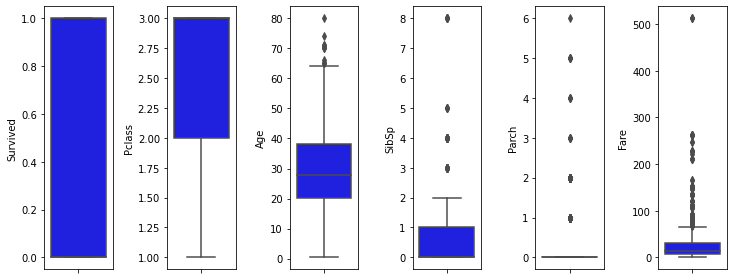

In [5]:
plt.figure(figsize=(12,4))
for i in range(0, len(numericals)):
  plt.subplot(1, 7, i+1)
  sns.boxplot(y=df[numericals[i]], color='blue', orient='vertical')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


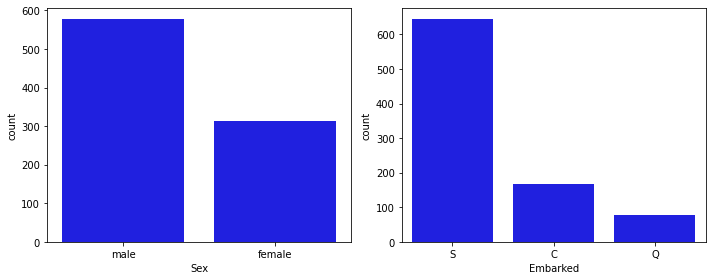

In [18]:
plt.figure(figsize=(10,4))
for i in range (0, len(categoricals)):
  plt.subplot(1,2, i+1)
  sns.countplot(df[categoricals[i]], color='blue')
  plt.tight_layout()

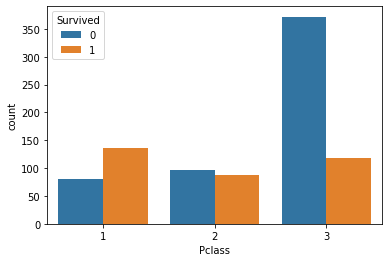

In [27]:
#menghitung penumpang yang selamat berdasarkan 'Pclass'
sns.countplot(x='Pclass', data=df, hue='Survived')

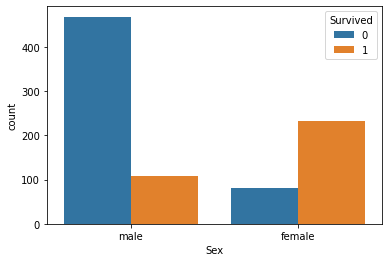

In [28]:
#menghitung penumpang yang selamat berdasarkan 'Sex'
sns.countplot(x='Sex', data=df ,hue='Survived')

### **Data Cleaning**

Pada tahap data cleaning ini saya melakukan beberapa tahapan yaitu :
*   Terdapat value yang kosong pada kolom 'Age' dan 'Embarked' yang akan di replace dengan nilai *mean* dan *mod*
*   Mendrop kolom yang tidak digunakan/ memiliki banyak nilai kosong



In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# mengisi missing value pada kolom 'Age' dengan nilai mean
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [24]:
# mengisi missing value pada kolom 'Embarked' dengan nilai mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [29]:
#mendrop kolom yang tidak digunakan
data = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


### **Label Encoding on Categorical Columns**

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [32]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2
5,0,2,1,39,0,0,51,1
6,0,0,1,70,0,0,186,2
7,0,2,1,6,3,1,124,2
8,1,2,0,35,0,2,74,2
9,1,1,0,18,1,0,154,0


## **Modeling**

In [52]:
#split data menjadi dua bagian yaitu x=fitur, y=target_label.
x = data.iloc[:,1:8].values
y = data.iloc[:,0].values

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [58]:
#split data dengan rasio 80 : 20
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
#membuat model machine learning
def models(x_train, y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression()
  log.fit(x_train,y_train)

  # Support Vector Machine Classfication
  from sklearn.svm import SVC
  svc = SVC(kernel="rbf")
  svc.fit(x_train,y_train)

  # Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  guass = GaussianNB()
  guass.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
  forest.fit(x_train, y_train)

  print('[0]LogisticRegression Training Acc : ' , log.score(x_train, y_train))
  print('[1]SVM Classfication Training Acc : ' , svc.score(x_train, y_train))
  print('[2]Naive Bayes Training Acc : ' , guass.score(x_train, y_train))
  print('[3]Decision Tree Training Acc : ' , tree.score(x_train, y_train))
  print('[]RandomForest Training Acc : ' , forest.score(x_train, y_train))

  return log, svc, guass, tree, forest

In [126]:
model = models(x_train, y_train)

[0]LogisticRegression Training Acc :  0.7991573033707865
[1]SVM Classfication Training Acc :  0.8412921348314607
[2]Naive Bayes Training Acc :  0.7640449438202247
[3]Decision Tree Training Acc :  0.9803370786516854
[]RandomForest Training Acc :  0.9691011235955056


##**Evaluation** 

Pada tahap ini, kami menggunakan matriks evaluasi Akurasi. Akurasi adalah salah satu metrik untuk mengevaluasi model prediksi. Secara informal, akurasi adalah sebagian kecil dari prediksi model kami yang benar :

In [127]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} "'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[89 16]
 [21 53]]
Model[0] Testing Accuracy = "0.7932960893854749 "

[[93 12]
 [21 53]]
Model[1] Testing Accuracy = "0.8156424581005587 "

[[77 28]
 [14 60]]
Model[2] Testing Accuracy = "0.7653631284916201 "

[[86 19]
 [18 56]]
Model[3] Testing Accuracy = "0.7932960893854749 "

[[91 14]
 [20 54]]
Model[4] Testing Accuracy = "0.8100558659217877 "



## **Deployment**

In [135]:
#Mendapatkan fitur yang penting
forest = model[4]
importances = pd.DataFrame({'feature':data.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.281
Age,0.277
Sex,0.231
Pclass,0.076
SibSp,0.061
Parch,0.038
Embarked,0.035


In [136]:
pred = model[4].predict(x_test)
print(pred)

#Print a space
print()

#Print the actual values
print(y_test)

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [138]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[4].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didnt make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didnt make it
